In [4]:
import os
import torch
import matplotlib.pyplot as plt
from torch_geometric.data import Data

# Function to load PyG objects from a directory
def load_data_from_directory(directory):
    data_list = []
    for filename in os.listdir(directory):
        if filename.endswith('.pt'):
            data = torch.load(os.path.join(directory, filename), weights_only=False)
            data_list.append(data)

    # Flatten the list
    data_list = [item for sublist in data_list for item in sublist]
    return data_list

# Load data
data_directory = '../data/processed/sioux_falls_simulation_24_zones_OD_10K'
data_list = load_data_from_directory(data_directory)

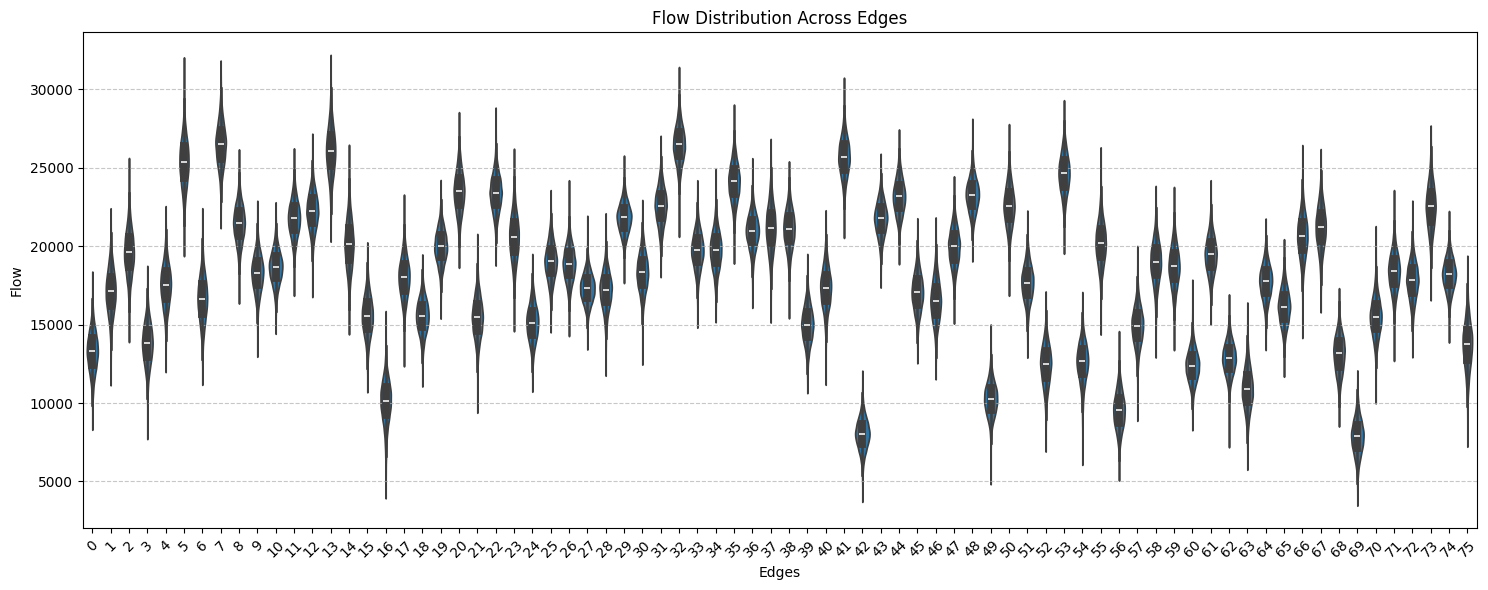

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your initial setup
edge_flows_dict = {i: [] for i in range(len(data_list[0].y))}

# Populate the dictionary with flows from each graph
for graph in data_list:
    edge_flows = graph.y.numpy()
    for edge_idx, flow in enumerate(edge_flows):
        edge_flows_dict[edge_idx].append(flow)

# Step 1: Flatten the dictionary into a DataFrame
data = []
for edge_idx, flows in edge_flows_dict.items():
    for flow in flows:
        data.append({"Edge": edge_idx, "Flow": flow})

df = pd.DataFrame(data)

# Step 2: Plot the violin plot
plt.figure(figsize=(15, 6))
sns.violinplot(data=df, x="Edge", y="Flow")

# Step 3: Add labels, title, and formatting
plt.xlabel("Edges")
plt.ylabel("Flow")  # You can replace with a dynamic feature name if needed
plt.title("Flow Distribution Across Edges")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [6]:
from sklearn.metrics import mean_absolute_error

mean_edge_flow = df.groupby('Edge')['Flow'].mean()

# Calculate the mean absolute error using sklearn
mae_mean_prediction = mean_absolute_error(df['Flow'], df['Edge'].map(mean_edge_flow))
print(f"Mean Absolute Error when predicting the mean for each edge: {mae_mean_prediction}")

Mean Absolute Error when predicting the mean for each edge: 963.3132934570312
